#### Perform a variety of pre-processing steps on images

* Image Loading
* Image Resizing (All images are 224 X 224 X 3 in jpg format)
* Image Cropping (All images in the dataset have been cropped so that only the image of a single card is present and the card occupies well over 50% of the pixels in the image)
* Convert to Grayscale 
* Image Enhancement (histogram equalization, sharpening, noise reduction, etc.)
* Normalization
* Data Augmentation: Apply data augmentation techniques to increase the size and diversity of your dataset. This can include random rotations, flips, translations, or other transformations to simulate different viewpoints or variations in lighting conditions.
* Image Filtering: : Apply filters or convolutions to smooth the image or enhance specific features. This can include techniques such as blurring (e.g., Gaussian blur), edge detection (e.g., Sobel, Canny), or other spatial filters.


In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Image Loading

In [2]:
# Load images from csv file

path = pd.read_csv('Dataset/cards.csv')
path_df = pd.DataFrame(path)
# For column names that contain space, replace the space with an underscore
path_df.columns = [c.replace(' ', '_') for c in path_df.columns]
path_df.head()

,class_index,filepaths,labels,card_type,data_set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


## Check Image Size

In [6]:
grouped_card_type = path_df['card_type']
grouped_labels = path_df['labels']

In [19]:
# All images are 224 X 224 X 3 in jpg format
# Double check by printing out unique shapes of images

images = []
image_shapes = []
for folder in path_df.data_set.unique():
    for filepath in path_df[path_df.data_set == folder].filepaths:
        image = cv2.imread('Dataset/' + filepath)

        if (filepath[-3:] == "jpg"):
            # Convert to gray
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
            images.append(image)

            # Obtain shape of each image and store them in an array
            (width, height) = image.shape[1], image.shape[0]
            image_shapes.append((width, height))
    
# Return only unique shapes
unique_shapes = list(set(image_shapes))
print(unique_shapes)

[(224, 224)]


## Convert Images to Grayscale

In [21]:
# Convert images to grayscale

def convert_to_grayscale(filepath):
    filename = 'Dataset/' + filepath
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

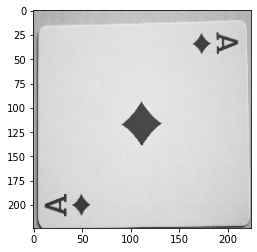

In [22]:
# Test if image is actually gray

test_colored_image = 'train/ace of diamonds/001.jpg'
test_gray_img = convert_to_grayscale(test_colored_image)
plt.imshow(test_gray_img, cmap='gray', vmin=0, vmax=255)

## Image Enhancement (Work in Progress)

Apply techniques to improve the image quality or highlight specific features. This may include operations such as contrast adjustment, histogram equalization, sharpening, or noise reduction.

(Working on it below)

#### Sharpening
Enhance the edges and details in the images to make them visually sharper. Techniques like unsharp masking (cv2.filter2D() in OpenCV) or high-pass filtering can be used to emphasize high-frequency components and enhance image details.

#### Noise Reduction
Apply noise reduction techniques to remove or reduce unwanted noise or artifacts in the images. Common approaches include Gaussian blurring (cv2.GaussianBlur() in OpenCV) or median filtering (cv2.medianBlur() in OpenCV).

#### Image Denoising 
Apply denoising techniques to reduce noise while preserving important image details. Methods like non-local means denoising (cv2.fastNlMeansDenoisingColored() in OpenCV) or bilateral filtering (cv2.bilateralFilter() in OpenCV) can be effective in reducing noise.

### Contrast Stretch

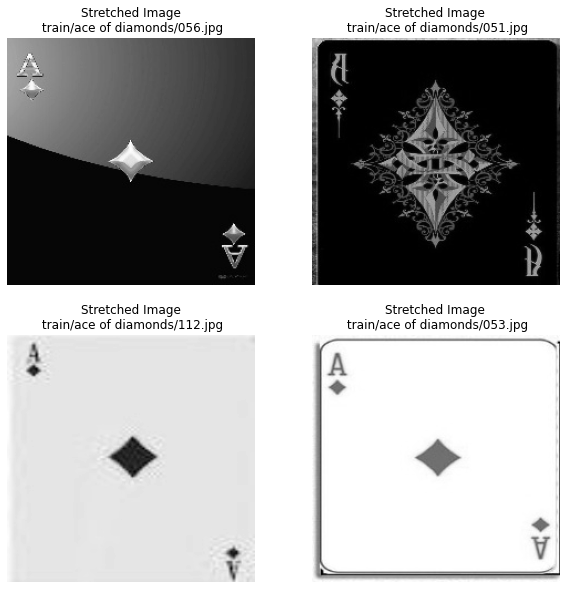

In [23]:
# Contrast Stretch/Adjustment

image_directory = 'Dataset'

# Testing four images first
image_filenames = ['train/ace of diamonds/056.jpg', 
                   'train/ace of diamonds/051.jpg', 
                   'train/ace of diamonds/112.jpg', 
                   'train/ace of diamonds/053.jpg']

# Set up the subplot grid
num_images = len(image_filenames)
num_cols = 2  # Number of columns in the grid
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Loop through the image filenames
for i, filename in enumerate(image_filenames):
    gray = convert_to_grayscale(filename)

    # Apply contrast stretching using min-max normalization
    min_val = gray.min()
    max_val = gray.max()
    stretched = cv2.normalize(gray, None, min_val, max_val, cv2.NORM_MINMAX)

    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(stretched, cmap='gray')
    ax.set_title(f"Stretched Image\n {filename}")
    ax.axis('off')


    # Save the contrast-stretched image
    output_filename = f"stretched_{filename}"
    output_path = os.path.join("Dataset", output_filename)
    cv2.imwrite(output_path, stretched)
    


### Histogram Equilization (Might not be useful)

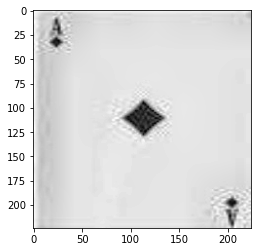

In [24]:
test_colored_image = 'train/ace of diamonds/112.jpg'
test_gray_img = convert_to_grayscale(test_colored_image)
plt.imshow(test_gray_img, cmap='gray')

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(test_gray_img)
equalized
plt.imshow(equalized, cmap='gray')

### Sharpening

In [25]:
# Sharpen images

def rmse(img1, img2):
    """Calculate and return Root mean squared error"""
    return np.sqrt(np.mean(np.square(img1 - img2)))


# create a convolution function that takes in a grayscale image and a kernel as input
# and returns the convolved image (as a numpy array)

def convolution(in_im, h):
    out_im = np.zeros(in_im.shape)
    img_height, img_width = in_im.shape
    
    # For nxn kernels
    if len(h.shape) > 1:
        kernel_height, kernel_width = h.shape
        padded_img = np.pad(in_im, (1,), 'wrap')
    # For 1D kernels
    else:
        kernel_height = 1
        kernel_width = h.shape[0]
        padded_img = np.pad(in_im, ((0,0),(1,1)), 'wrap')
    
    for height in range(img_height):
        for width in range(img_width):
            region = padded_img[height:height+kernel_height, width:width+kernel_width]
            convolution = np.sum(region * h)
            
            out_im[height, width] = convolution
    
    return out_im

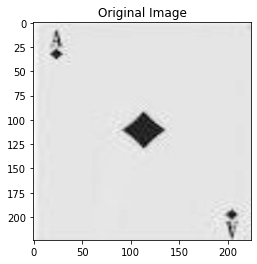

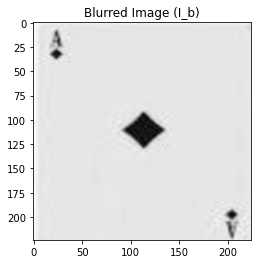

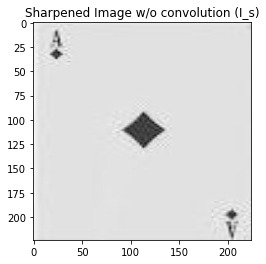

In [26]:
# Check image sharpness

im_path = 'train/ace of diamonds/112.jpg'
im = convert_to_grayscale(im_path)

h = np.array([[0.0625, 0.125, 0.0625],
              [0.125, 0.25, 0.125],
              [0.0625, 0.125, 0.0625]])

I_b = convolution(im, h)
I_h = im - I_b
I_s = I_h + im 
I_sp = convolution(im, ((np.array([[0, 0, 0], [0, 1, 0],[0, 0, 0]])*2) - h))


# Display images
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.show()

plt.imshow(I_b, cmap='gray')
plt.title('Blurred Image (I_b)')
plt.show()

plt.imshow(I_s, cmap='gray')
plt.title('Sharpened Image w/o convolution (I_s)')
plt.show()

# plt.imshow(I_sp, cmap='gray', vmin=0, vmax=255)
# plt.title('Sharpened Image w/ convolution (I_sp)')
# plt.show()

In [27]:
# print blur score to make sure the image gets sharpened
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

im_path = 'train/ace of diamonds/112.jpg'
gray_image = convert_to_grayscale(im_path)

original_blur_score = variance_of_laplacian(gray_image)
print("Original Blur Score: ", original_blur_score)

sharpened_blur_score = variance_of_laplacian(I_sp)  # The higher the blur score, the sharper the image
print("Sharpened Blur Score: ", sharpened_blur_score)

Original Blur Score:  40.6705862674451
Sharpened Blur Score:  92.19376277635615


## Normalization

In [28]:
# Normalization

def normalize_img(img):
    normalized = (img - np.min(img))/(np.max(img) - np.min(img))   
    return normalized

[[0.66137566 0.65608466 0.64021164 ... 0.68783069 0.68783069 0.6984127 ]
 [0.65608466 0.64021164 0.66137566 ... 0.68253968 0.71428571 0.70899471]
 [0.65079365 0.65608466 0.66666667 ... 0.69312169 0.6984127  0.68783069]
 ...
 [0.66137566 0.66137566 0.57142857 ... 0.56613757 0.57142857 0.59259259]
 [0.63492063 0.60846561 0.61904762 ... 0.56613757 0.60846561 0.59259259]
 [0.64550265 0.5978836  0.62433862 ... 0.58201058 0.55555556 0.61375661]]
min 0.0
max 1.0


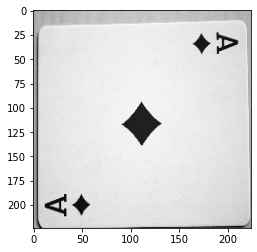

In [29]:
# Test normalization function

test_colored_image = 'train/ace of diamonds/001.jpg'
test_gray_img = convert_to_grayscale(test_colored_image)

norm = normalize_img(test_gray_img)
print(norm)
print("min", np.min(norm))
print("max", np.max(norm))
plt.imshow(norm, cmap='gray')

## Other Preprocessing steps

### Data Augmentation (done concurrently with feature extraction?)
Apply data augmentation techniques to increase the size and diversity of your dataset. This can include random rotations, flips, translations, or other transformations to simulate different viewpoints or variations in lighting conditions.


### Image Filtering (done concurrently with feature extraction?)
Apply filters or convolutions to smooth the image or enhance specific features. This can include techniques such as blurring (e.g., Gaussian blur), edge detection (e.g., Sobel, Canny), or other spatial filters.

## Working on code for slanted images

## Rectify (still work in progress)

####  main issue: many of the slanted images have corners that are outside the frame 
#### other issue: can't get the cards to be oriented up right because don't know what top left corner is

In [ ]:
def calculate_distance(point_a, point_b):
    x1, y1 = point_a[0], point_a[1]
    x2, y2 = point_b[0], point_b[1]
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def remove_duplicates(points, threshold=20):
    unique_points = []
    for i in range(len(points)):
        is_duplicate = False
        for j in range(i + 1, len(points)):
            distance = calculate_distance(points[i], points[j])
            if distance <= threshold:
                is_duplicate = True
                break
        if not is_duplicate:
            unique_points.append(points[i])
    return unique_points

In [ ]:
def rectify(grayscale_image):
    # Perform edge detection (e.g., Canny edge detection)
    edges = cv2.Canny(grayscale_image, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Approximate polygons for each contour
    approx_polygons = [cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True) for cnt in contours]

    # Find the contour with the maximum approximate polygon
    max_approx_polygon = max(approx_polygons, key=cv2.contourArea)
    
    max_approx_polygon_list = [list(max_approx_polygon[i][0]) for i in range(0,len(max_approx_polygon))]
    max_approx_polygon_list = remove_duplicates(max_approx_polygon_list)
    if (len(max_approx_polygon_list) != 4) or (cv2.contourArea(max_approx_polygon) < (0.3 * grayscale_image.size)):
        # Return the grayscale image as is
        return grayscale_image
    # Define the dimensions for the rectified image
    width = 224  # Desired width for the rectified image
    height = 224  # Desired height for the rectified image

    # Determine target corners and points
    target_corners = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
    
    #if length of first side is less then second, then first point is top left corner
    distance_1 = int(calculate_distance(max_approx_polygon_list[0],max_approx_polygon_list[1]))
    distance_2 = int(calculate_distance(max_approx_polygon_list[1],max_approx_polygon_list[2]))
    distance_3 = int(calculate_distance(max_approx_polygon_list[2],max_approx_polygon_list[3]))
    distance_4 = int(calculate_distance(max_approx_polygon_list[3],max_approx_polygon_list[0]))  
    if(((distance_1 + distance_3)/2) > ((distance_2+distance_4)/2)):  
        top_left = max_approx_polygon_list[0]
        bottom_left = max_approx_polygon_list[1]
        bottom_right = max_approx_polygon_list[2]
        top_right = max_approx_polygon_list[3]
    #else the second point is top left corner 
    else:
        top_left = max_approx_polygon_list[1]
        bottom_left = max_approx_polygon_list[2]
        bottom_right = max_approx_polygon_list[3]
        top_right = max_approx_polygon_list[0]
    source_corners = np.float32([top_left, top_right, bottom_left, bottom_right])
    
    # Compute perspective transformation matrix
    transform_matrix = cv2.getPerspectiveTransform(source_corners, target_corners)

    # Apply perspective transformation to rectify the image
    rectified = cv2.warpPerspective(grayscale_image, transform_matrix, (width, height))

    return rectified

In [ ]:
#known slanted

known_slanted = ['train/five of spades/098.jpg','train/ace of diamonds/125.jpg','train/ace of spades/055.jpg', 'train/ace of spades/082.jpg','train/ace of diamonds/063.jpg']
#train_image_paths = path_df[path_df.data_set == "train"].filepaths.tolist()

num_slanted = len(known_slanted)

# Randomly select 10 filepaths
image_paths = random.sample(known_slanted, k=num_slanted)
gray_images = []
for path in image_paths:
    gray = convert_to_grayscale(path)
    gray_images.append(gray)

# Rectify the grayscale images
rectified_images = [rectify(gray_image) for gray_image in gray_images]

# Plot the original and rectified images
fig, axs = plt.subplots(num_slanted, 2, figsize=(10, 10))

for i in range(num_slanted):
    axs[i, 0].imshow(gray_images[i])
    axs[i, 0].set_title('Original Image')

    axs[i, 1].imshow(rectified_images[i], cmap='gray')
    axs[i, 1].set_title('Rectified Image')

    axs[i, 0].axis('off')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib tk
def white_patch(input_img):
    # TODO: get point(s) from user (choose a point)
    # compute scale factors for each color channel (calculate average color of region around point)
    # rescale each color channel (multiply invers proportion of region average by each channel)
    
    plt.imshow(input_img)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.title('Choose a white point on the image')
    
    point = plt.ginput(2)
    point = (int(point[0][0]), int(point[0][1]))
    
    region = input_img[point[1]-10:point[1]+10, point[0]-10:point[0]+10]
    region_avg_color = np.mean(region, axis=(0,1))
    scale_region = 1/region_avg_color
    
    wb_img = input_img.copy()
    wb_img[:,:,0] *= scale_region[0]
    wb_img[:,:,1] *= scale_region[1]
    wb_img[:,:,2] *= scale_region[2]
    
    wb_img = np.clip(wb_img, 0, 1)
    
    return wb_img

gray_world_output = gray_world(input_img)
white_patch_output = white_patch(input_img)

%matplotlib inline
fig1 = plt.figure()
plt.imshow(gray_world_output)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('Gray-World')
plt.show()

fig2 = plt.figure()
plt.imshow(white_patch_output)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('White-Patch')
plt.show()

In [ ]:
%matplotlib tk
image = cv2.imread('Dataset/train/ace of diamonds/063.jpg')
gray = convert_to_grayscale('train/ace of diamonds/063.jpg')

plt.imshow(gray, cmap='gray')

plt.xticks(ticks=[])
plt.yticks(ticks=[])
point = plt.ginput(4)
# point = (int(point[0][0]), int(point[0][1]))
plt.close()

for p in point:
    print(p)

In [ ]:
def get_image_corners(image_path):
    # Load the image in grayscale
#     image = cv2.imread(image_path, 0)
#     image = cv2.imread('Dataset/train/ace of diamonds/063.jpg')
    image = convert_to_grayscale(image_path)
    
    # Set the parameters for corner detection
    max_corners = 4
    quality_level = 0.01
    min_distance = 10
    block_size = 3
    
    # Perform corner detection
    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance, blockSize=block_size)
    
    # Convert the corner coordinates to integers
    corners = np.int0(corners)
    
    # Extract and return the corner points
    image_corners = [corner.ravel() for corner in corners]
    return image_corners

# Specify the path to the image
image_path = 'train/ace of diamonds/063.jpg'

# Get the image corners
corners = get_image_corners(image_path)

# Print the corner points
print("Image Corners:")
for corner in corners:
    print(corner)

In [ ]:
gray = convert_to_grayscale('train/ace of diamonds/063.jpg')
corner_detector = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

corner_detector = cv2.dilate(corner_detector, None)
threshold = 0.01 * corner_detector.max()
_, corner_mask = cv2.threshold(corner_detector, threshold, 255, cv2.THRESH_BINARY)
corner_mask = np.uint8(corner_mask)
_, contours, _ = cv2.findContours(corner_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
corners = np.float32([corner[0] for corner in contours[0]])

corners = sort_corners_clockwise(corners)

print(corners)
